In [7]:

import os

os.listdir()

os.listdir("Data")    # try this




['EV_Pop_Growth_23_24.csv']

In [6]:
%pip install pgeocode


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

df_EV_Pop_Zip = pd.read_csv("Data/EV_Pop_Growth_23_24.csv")
df_EV_Pop_Zip_cleaned = df_EV_Pop_Zip.dropna()
#df_EV_Pop_Zip.head()
#df_EV_Pop_Zip.tail()
print(df_EV_Pop_Zip)
print(df_EV_Pop_Zip_cleaned)
df_EV_Pop_Zip_cleaned["zip"] = (
    df_EV_Pop_Zip_cleaned["Zip Code"]
    .astype(str)
    .str.extract(r"(\d{3,5})", expand=False)
    .str.zfill(5)
)



#Merge_me = [Insert Dataframe Here]

#df_EV_Pop_Zip_cleaned_merged = pd.merge(df_EV_Pop_Zip_cleaned, Merge_me, on 'Zip Code', how = 'outer')
#Merge_me.head()




      Zip Code    2023    2024  YoY Change   %change
0        89061     1.0     1.0           0  0.000000
1        90001   295.0   449.0         154  0.522034
2        90002   253.0   396.0         143  0.565217
3        90003   318.0   507.0         189  0.594340
4        90004  1775.0  2241.0         466  0.262535
...        ...     ...     ...         ...       ...
2395     96155     7.0     6.0          -1 -0.142857
2396     96158    16.0    21.0           5  0.312500
2397     96160    22.0    37.0          15  0.681818
2398     96161   746.0   944.0         198  0.265416
2399     96162    14.0    21.0           7  0.500000

[2400 rows x 5 columns]
      Zip Code    2023    2024  YoY Change   %change
0        89061     1.0     1.0           0  0.000000
1        90001   295.0   449.0         154  0.522034
2        90002   253.0   396.0         143  0.565217
3        90003   318.0   507.0         189  0.594340
4        90004  1775.0  2241.0         466  0.262535
...        ...     ..

/tmp/ipykernel_542/2628283456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EV_Pop_Zip_cleaned["zip"] = (


In [4]:
df_EV_Pop_Zip_cleaned["zip"] = (
    df_EV_Pop_Zip_cleaned["Zip Code"]
    .astype(str)
    .str.extract(r"(\d{3,5})", expand=False)
    .str.zfill(5)
)

/tmp/ipykernel_542/3249605650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EV_Pop_Zip_cleaned["zip"] = (


In [7]:


import pgeocode


nomi = pgeocode.Nominatim("us")

# Query all ZIPs at once
geo = nomi.query_postal_code(df_EV_Pop_Zip_cleaned["zip"])

# `geo` is a DataFrame: columns include postal_code, latitude, longitude, state_code, etc.
geo = geo[["postal_code", "latitude", "longitude", "state_code"]]

# Merge back onto your EV data
df_geo = df_EV_Pop_Zip_cleaned.merge(geo, left_on="zip", right_on="postal_code", how="left")

df_ca = df_geo[df_geo["state_code"] == "CA"].copy()

# Drop any rows where lat/long is missing
df_ca = df_ca.dropna(subset=["latitude", "longitude"])

print(df_ca.head())

Empty DataFrame
Columns: [Zip Code, 2023, 2024, YoY Change, %change, zip, postal_code, latitude, longitude, state_code]
Index: []


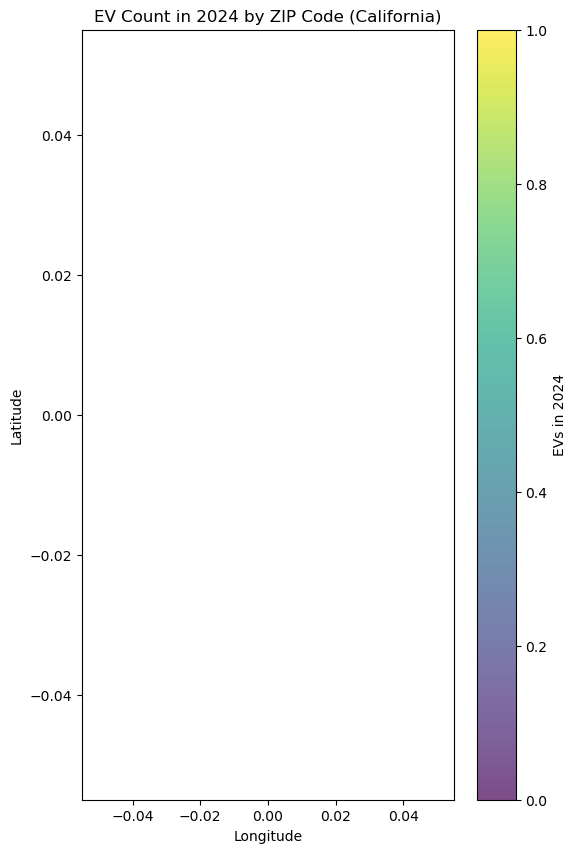

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 10))

# Avoid crazy marker sizes by scaling relative to max
size_scale = 300  # tweak this to make dots bigger/smaller

sc = ax.scatter(
    df_ca["longitude"],
    df_ca["latitude"],
    s=(df_ca["2024"] / df_ca["2024"].max()) * size_scale,
    c=df_ca["2024"],
    alpha=0.7,
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("EV Count in 2024 by ZIP Code (California)")

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("EVs in 2024")

plt.show()
